In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import unicodedata
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

In [265]:
#Read and cleanup
df = pd.read_csv('data/movie_new.tsv', delimiter='\t', encoding='ISO-8859-1')
# indexes = df[ df['genre'] == 'News'].index
# df.drop(indexes, inplace=True)
# indexes = df[ df['genre'] == 'Game-Show'].index
# df.drop(indexes, inplace=True)
# indexes = df[ df['genre'] == 'Reality-TV'].index
# df.drop(indexes, inplace=True)
# indexes = df[ df['genre'] == 'Talk-Show'].index
# df.drop(indexes, inplace=True)
# indexes = df[ df['genre'] == 'Short'].index
# df.drop(indexes, inplace=True)
# indexes = df[ df['genre'] == 'Biography'].index
# df.drop(indexes, inplace=True)
# indexes = df[ df['genre'] == 'Film-Noir'].index
# df.drop(indexes, inplace=True)
#df.drop_duplicates(subset='movie', inplace=True)


In [266]:
indexes = df[ df['genre'].str.find('Adult') != -1 ].index
df.drop(indexes, inplace=True)
indexes = df[ df['genre'].str.find('News') != -1 ].index
df.drop(indexes, inplace=True)
indexes = df[ df['genre'].str.find('Talk-Show') != -1 ].index
df.drop(indexes, inplace=True)
indexes = df[ df['genre'].str.find('Game-Show') != -1 ].index
df.drop(indexes, inplace=True)
indexes = df[ df['genre'].str.find('Short') != -1 ].index
df.drop(indexes, inplace=True)
indexes = df[ df['genre'].str.find('Reality-TV') != -1 ].index
df.drop(indexes, inplace=True)
indexes = df[ df['genre'].str.find('Film-Noir') != -1 ].index
df.drop(indexes, inplace=True)
indexes = df[ df['genre'].str.find('Sport') != -1 ].index
df.drop(indexes, inplace=True)
indexes = df[ df['genre'].str.find('Musical') != -1 ].index
df.drop(indexes, inplace=True)
indexes = df[ df['genre'].str.find('Music') != -1 ].index
df.drop(indexes, inplace=True)

df['genre'] = df['genre'].str.replace('History', 'War')
df['genre'] = df['genre'].str.replace('War', 'Action')
df['genre'] = df['genre'].str.replace('Sci-Fi', 'Fantasy')
df['genre'] = df['genre'].str.replace('Western', 'Action')
df['genre'] = df['genre'].str.replace('Crime', 'Drama')
df['genre'] = df['genre'].str.replace('Mystery', 'Thriller')
df['genre'] = df['genre'].str.replace('Adventure', 'Action')
df['genre'] = df['genre'].str.replace('Biography', 'Documentary')


In [267]:
ser = pd.Series(df['genre'].str.split(','))
for index, lis in enumerate(ser):
    ser.iat[index] = pd.unique(lis)[:2]

In [268]:
df['genre'] = ser

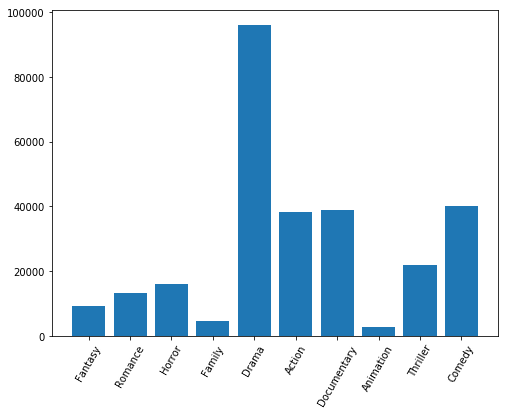

In [269]:
#Majority of movies are comedy, documentary or drama apparently.
#Before transformations

fig = plt.figure(figsize=(8,6))
genreC = {}
for genres in df.genre:
    for genre in genres:
        try:
            genreC[genre] = genreC[genre] + 1
        except KeyError:
            genreC[genre] = 0
plt.bar(genreC.keys(), genreC.values())
plt.xticks(rotation=60)
plt.show()

In [101]:
from sklearn.svm import LinearSVC
from sklearn_porter import Porter

tfidf = TfidfVectorizer(lowercase = True, sublinear_tf=True, norm='l2', ngram_range=(1, 2), strip_accents='unicode')
features = tfidf.fit_transform(df.movie)
x_train, x_val, y_train, y_val, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.30, random_state=5000)
#unweighted:
svc = LinearSVC()
labels = df.genre_id
svc.fit(x_train, y_train)
print("unweighted:")
print(svc.score(x_val, y_val))

#weighted:
svc_w = LinearSVC(class_weight='balanced')
print("weighted")
svc_w.fit(x_train, y_train)
print(svc_w.score(x_val, y_val))

AttributeError: 'DataFrame' object has no attribute 'genre_id'

In [53]:
from sklearn.externals import joblib
joblib.dump(svc_w, 'model.pkl')

['model.pkl']

In [12]:
def getsvcprediction(model, title):
    return {title : id_to_category[model.predict(tfidf.transform([title]))[0]]}

In [13]:
#print(x_train)
print(getsvcprediction(svc, "Crocodile Dundee"))
print(getsvcprediction(svc, "Bee Movie"))
print(getsvcprediction(svc, "Toy Story"))
print(getsvcprediction(svc, "Zombies Return"))
print(getsvcprediction(svc, "Blade Runner"))
print(getsvcprediction(svc, "The Tower"))
print(getsvcprediction(svc, "Berlins Brewery"))
print(getsvcprediction(svc, "Bubble Kid"))
print(getsvcprediction(svc, "Overlord"))

print()
print(getsvcprediction(svc_w, "Crocodile Dundee"))
print(getsvcprediction(svc_w, "Bee Movie"))
print(getsvcprediction(svc_w, "Toy Story"))
print(getsvcprediction(svc_w, "Zombies Return"))
print(getsvcprediction(svc_w, "Blade Runner"))
print(getsvcprediction(svc_w, "The Tower"))
print(getsvcprediction(svc_w, "Berlins Brewery"))
print(getsvcprediction(svc_w, "Bubble Kid"))
print(getsvcprediction(svc_w, "Overlord"))


{'Crocodile Dundee': 'Comedy'}
{'Bee Movie': 'Adventure'}
{'Toy Story': 'Family'}
{'Zombies Return': 'Horror'}
{'Blade Runner': 'Sci-Fi'}
{'The Tower': 'Drama'}
{'Berlins Brewery': 'Music'}
{'Bubble Kid': 'Animation'}
{'Overlord': 'Drama'}

{'Crocodile Dundee': 'Comedy'}
{'Bee Movie': 'Adventure'}
{'Toy Story': 'Family'}
{'Zombies Return': 'Horror'}
{'Blade Runner': 'Sci-Fi'}
{'The Tower': 'Sci-Fi'}
{'Berlins Brewery': 'Music'}
{'Bubble Kid': 'Animation'}
{'Overlord': 'Drama'}


In [270]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
mlb.fit(df.genre)
labels = mlb.classes_

filter_length = 300
max_words = 8000
maxlen = 2000

num_classes = len(genreC)
tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(df.movie)

def get_features(text_series):
    sequences = tokenizer.texts_to_sequences(text_series)
    return pad_sequences(sequences, maxlen=maxlen)

def prediction_to_label(prediction):
    tag_prob = [(labels[i], prob) for i, prob in enumerate(prediction.tolist())]
    return dict(sorted(tag_prob, key=lambda kv: kv[1], reverse=True))
    
def baseline():
    model = Sequential()
    model.add(Dense(num_classes, input_dim=maxlen, activation='relu'))
    model.add(Dense(num_classes, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['categorical_accuracy'])
    return model

def classify_movies_conv1d():
    # create model
    model = Sequential()
    model.add(Embedding(max_words, num_classes, input_length=maxlen))
    model.add(Dropout(0.1))
    model.add(Conv1D(filter_length, 3, padding='valid', activation='relu', strides=1))
    model.add(GlobalMaxPool1D())
    model.add(Dense(num_classes))
    model.add(Activation('sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['categorical_accuracy'])
    return model

def classify_movies_maxpool():
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))
    model.add(layers.GlobalMaxPool1D())
    model.add(layers.Dense(num_classes, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model;

In [271]:
from sklearn.model_selection import train_test_split

x = get_features(df.movie)
y = mlb.transform(df.genre)
print(x.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9000)

(204564, 2000)
(204564, 10)


In [275]:
countGenres = 0
for genres in df.genre:
    countGenres = countGenres + len(genres)

class_weight = {}
for index, label in enumerate(labels):
    class_weight[index] = countGenres/genreC[label]
    print(label + " " + str(countGenres/genreC[label]))


Action 7.361218619246862
Animation 102.80971512052594
Comedy 6.9887531654997765
Documentary 7.226478063307062
Drama 2.9368994334720964
Family 58.498129675810475
Fantasy 30.326761473820298
Horror 17.446110938952586
Romance 21.115670242292403
Thriller 12.872959253669913


In [278]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D

callbacks = [
    ReduceLROnPlateau(),
    EarlyStopping(patience=5),
    ModelCheckpoint(filepath='model-baseline-w.h5', save_best_only=True)
]

model = baseline()

import tensorflow as tf

history = model.fit(x_train, y_train,
                    class_weight=class_weight,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=callbacks)

baseline_model = keras.models.load_model('model-baseline-w.h5')
metrics = baseline_model.evaluate(x_test, y_test)
print("{}: {}".format(model.metrics_names[0], metrics[0]))
print("{}: {}".format(model.metrics_names[1], metrics[1]))


callbacks = [
    ReduceLROnPlateau(),
    EarlyStopping(patience=5),
    ModelCheckpoint(filepath='model-baseline-uw.h5', save_best_only=True)
]

model = baseline()

import tensorflow as tf

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=callbacks)

baseline_model = keras.models.load_model('model-baseline-uw.h5')
metrics = baseline_model.evaluate(x_test, y_test)
print("{}: {}".format(model.metrics_names[0], metrics[0]))
print("{}: {}".format(model.metrics_names[1], metrics[1]))

Train on 147285 samples, validate on 16366 samples
Epoch 1/20
147285/147285 [==============================] - 42s 284us/step - loss: 4.5079 - categorical_accuracy: 0.3156 - val_loss: 3.2374 - val_categorical_accuracy: 0.3280
Epoch 2/20
147285/147285 [==============================] - 36s 246us/step - loss: 3.3048 - categorical_accuracy: 0.3301 - val_loss: 3.2239 - val_categorical_accuracy: 0.3282
Epoch 3/20
147285/147285 [==============================] - 41s 279us/step - loss: 3.2992 - categorical_accuracy: 0.3301 - val_loss: 3.2213 - val_categorical_accuracy: 0.3282
Epoch 4/20
147285/147285 [==============================] - 38s 260us/step - loss: 3.2949 - categorical_accuracy: 0.3301 - val_loss: 3.2203 - val_categorical_accuracy: 0.3282
Epoch 5/20
147285/147285 [==============================] - 36s 246us/step - loss: 3.2946 - categorical_accuracy: 0.3301 - val_loss: 3.2198 - val_categorical_accuracy: 0.3282
Epoch 6/20
147285/147285 [==============================] - 35s 238us/step

In [282]:
callbacks = [
    ReduceLROnPlateau(),
    EarlyStopping(patience=5),
    ModelCheckpoint(filepath='model-conv1d_weighted.h5', save_best_only=True)
]

model = classify_movies_conv1d()
history = model.fit(x_train, y_train,
                    class_weight=class_weight,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=callbacks)

cnn_model_uw = keras.models.load_model('model-conv1d_weighted.h5')
metrics = cnn_model.evaluate(x_test, y_test)
print("{}: {}".format(model.metrics_names[0], metrics[0]))
print("{}: {}".format(model.metrics_names[1], metrics[1]))

Train on 147285 samples, validate on 16366 samples
Epoch 1/30
147285/147285 [==============================] - 286s 2ms/step - loss: 3.1885 - categorical_accuracy: 0.3303 - val_loss: 3.0318 - val_categorical_accuracy: 0.3452
Epoch 2/30
147285/147285 [==============================] - 314s 2ms/step - loss: 2.9963 - categorical_accuracy: 0.3513 - val_loss: 2.9985 - val_categorical_accuracy: 0.3172
Epoch 3/30
147285/147285 [==============================] - 333s 2ms/step - loss: 2.9053 - categorical_accuracy: 0.3612 - val_loss: 3.0091 - val_categorical_accuracy: 0.3166
Epoch 4/30
  4864/147285 [..............................] - ETA: 4:39 - loss: 2.8435 - categorical_accuracy: 0.3686

KeyboardInterrupt: 

In [285]:
conv1d = keras.models.load_model('model-conv1d_weighted.h5')
f = get_features(["Bee Movie"])
p1 = prediction_to_label(baseline_model.predict(f)[0])
df_t = pd.DataFrame()
df_t['label'] = p1.keys()
df_t['p'] = p1.values()
df_t.sort_values(by='p', ascending=False)[:20]

,label,p
9,Comedy,0.372101
3,Animation,0.351088
5,Drama,0.199918
7,Documentary,0.192329
6,Family,0.142128
8,Action,0.089701
0,Fantasy,0.082754
1,Thriller,0.060416
2,Horror,0.055683
4,Romance,0.053472
